# Useful tricks vol. 1 - k-NN

#### When to use
For small datasets, good as a baseline, easy to explain.

## 1. Loading dataset from sklearn.datasets, shuffling it

In [222]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()

Has these cool attributes:

In [223]:
print(iris.feature_names)
print(iris.target_names)
print(iris.data[:10])
print(iris.target[:10])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


Let's convert it into a dataframe, which can be easily sampled
- using `np.c_[]` will concatenate a column to an array (the target column) 

In [224]:
df = pd.DataFrame(np.c_[iris.data, iris.target], columns=iris.feature_names + ["target"])

In [225]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


`.sample` will shuffle the data (or randomly take a sample from it `frac` controls how many %)

In [226]:
df2 = df.sample(frac=0.75)

In [227]:
shuffled_targets = df2.values[:, -1]
shuffled_values = df2.values[:, :-1]

Check out unique values and their counts

In [228]:
print(np.bincount(shuffled_targets.astype('int64')))
print(np.unique(shuffled_targets))

[36 34 42]
[0. 1. 2.]


## 2. EDA
- pairplot to see relationships between the features and separability of the classes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001298B8BCF60>,
      dtype=object)

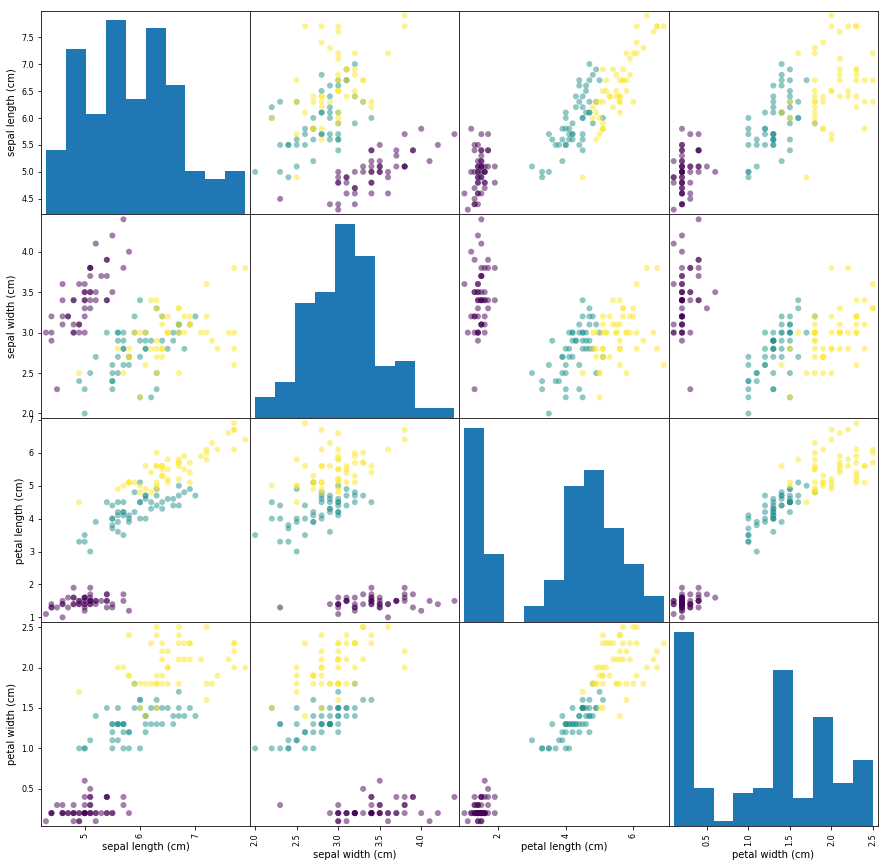

In [229]:
matrix = pd.plotting.scatter_matrix(df.drop("target", axis=1), c=iris.target, figsize=(15, 15), marker='o')
matrix

Simple scatter plot via matplotlib using 2 features

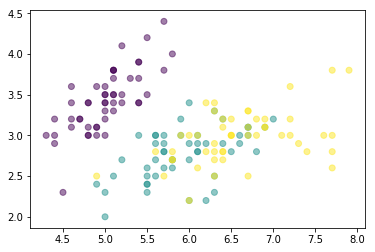

In [230]:
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.5, c=iris.target)

In [231]:
import mglearn
from sklearn.neighbors import KNeighborsClassifier

View separability of k-NN boundary

## k-NN tricks
### k-NN classification tricks

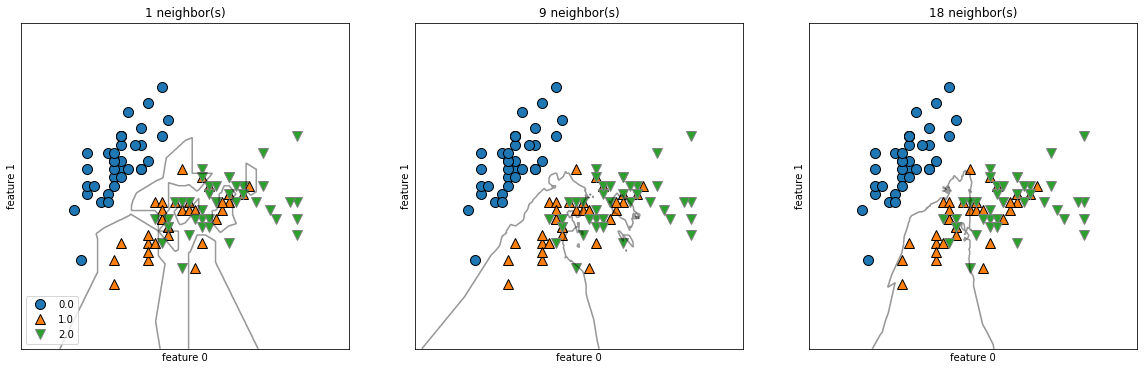

In [237]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
for n, axis in zip([1, 9, 18], ax):
    m = KNeighborsClassifier(n_neighbors=n).fit(shuffled_values[:, :2], shuffled_targets)
    mglearn.plots.plot_2d_separator(m, shuffled_values[:, :2], fill=False, ax=axis, alpha=.4)
    mglearn.discrete_scatter(shuffled_values[:, 0], shuffled_values[:, 1], shuffled_targets, ax=axis)
    axis.set_title("{} neighbor(s)".format(n))
    axis.set_xlabel("feature 0")
    axis.set_ylabel("feature 1")
ax[0].legend(loc=3)

Plot of training - testing accuracy in various setting of k-NN

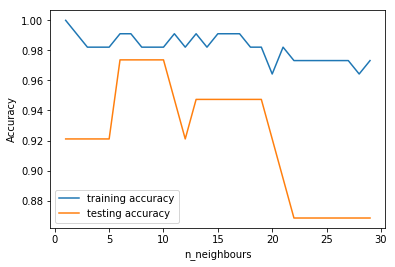

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

n_neighbours = range(1, 30)
train_acc = []
test_acc = []
for n in n_neighbours:
    m = KNeighborsClassifier(n_neighbors=n)
    m.fit(X_train, y_train)
    train_acc.append(m.score(X_train, y_train))
    test_acc.append(m.score(X_test, y_test))
    
plt.plot(n_neighbours, train_acc, label="training accuracy")
plt.plot(n_neighbours, test_acc, label="testing accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbours")
plt.legend()

## k-NN regression tricks

make synthetic regression wave dataset

In [246]:
from sklearn.neighbors import KNeighborsRegressor
import math
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y)

Check out the decision boundary

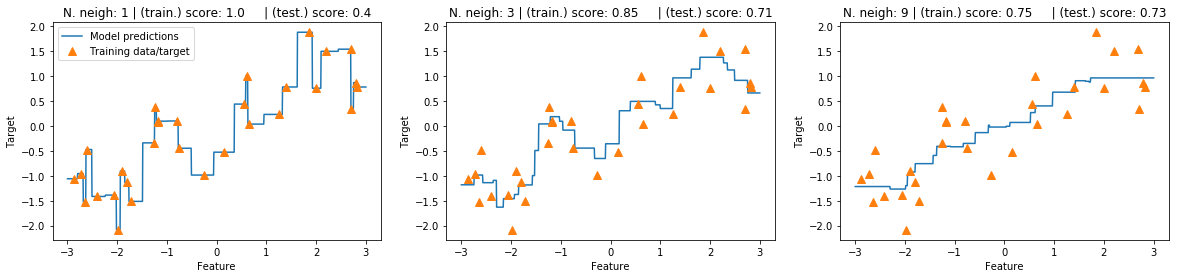

In [252]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
# data points to predict
line = np.linspace(-3,3,1000).reshape(-1,1)
for n, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=8)
    ax.set_title(f"N. neigh: {n} | (train.) score: {np.around(reg.score(X_train,y_train), decimals=2)} \
    | (test.) score: {np.around(reg.score(X_test, y_test), decimals=2)}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target"])